#### Imports

In [12]:
import pandas as pd # Pour la manipulation des données
import numpy as np # Pour les calculs numériques
from sklearn import tree # Pour les arbres de décision
from sklearn.tree import DecisionTreeClassifier # Pour les arbres de décision
import matplotlib.pyplot as plt # Pour les graphiques
from sklearn.model_selection import train_test_split # Pour séparer les données en ensembles d'entraînement et de test
from sklearn.linear_model import LinearRegression # Pour la régression linéaire
from sklearn.preprocessing import StandardScaler # Pour la normalisation des données
from sklearn.decomposition import PCA # Pour l'analyse en composantes principales
from sklearn.neural_network import MLPRegressor # Pour les réseaux de neurones
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score # Pour évaluer les modèles

# On load le dataset
data = pd.read_csv("listings.csv2.gz")

#### Collecte de données
afficher nombre de colonnes et de lignes


In [ ]:
print(f"Nombre de colonnes : {data.columns.__len__()}")
print(f"Nombre de lignes : {data.index.__len__()}")

## Pré-traitement des données

#### Sélection des colonnes les plus pertinentes à évaluer

#### Supprimer les doublons

#### Conversion des types de colonnes
- Conversion de Texte en Chiffres
- Extraction de Nombres
- Uniformisation des Données

## Analyse descriptive des données

#### Relation entre la note globale et les prix des locations à Paris

#### Prix moyen par type de propriété à Paris

#### Prix en fonction de Location disponible à Paris

#### Répartition des locations disponible et non disponible pour Paris

## Entraînement et test du modèle

#### Régression linéaire ALGO 1

#### Régression linéaire ALGO 2

## Prédiction du prix (Regression lineair)

#### Regression lineair ALGO

#### Comparer les valeurs prédites par le modèle aux valeurs réelles

## Prédiction du prix (Decision tree)

#### Decision tree ALGO 1

#### Decision tree ALGO 2

Réseaux de neurones

In [13]:
#traitement ;)

data.head()

data.info()
data.isna().sum()

data["price"] = (
    data["price"]
    .astype(str)
    .str.replace("$", "", regex=False)
    .str.replace(",", "", regex=False)
    .astype(float)
)

# eviter des prix pas cool
data = data[data["price"] > 10] 
data = data[data["price"] < 1000]

# je supprime si peut d'impacte
data = data.dropna(subset=[
    "latitude", "longitude",
    "minimum_nights",
    "number_of_reviews",
    "reviews_per_month",
    "calculated_host_listings_count",
    "availability_365"
])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84055 entries, 0 to 84054
Data columns (total 79 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            84055 non-null  int64  
 1   listing_url                                   84055 non-null  object 
 2   scrape_id                                     84055 non-null  int64  
 3   last_scraped                                  84055 non-null  object 
 4   source                                        84055 non-null  object 
 5   name                                          84055 non-null  object 
 6   description                                   81177 non-null  object 
 7   neighborhood_overview                         41178 non-null  object 
 8   picture_url                                   84054 non-null  object 
 9   host_id                                       84055 non-null 

MAE : 87.53223434622869
RMSE : 127.9299415430965
R² : 0.26993616390371344


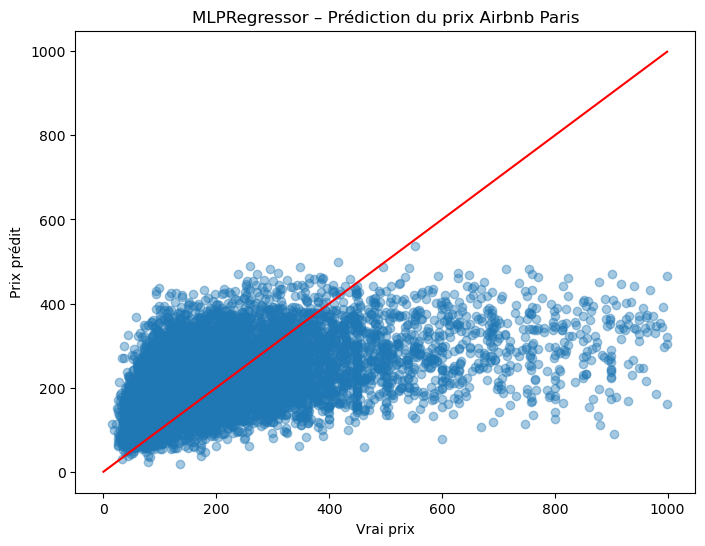

In [15]:
cols_X = [
    "latitude", "longitude",
    "minimum_nights", "number_of_reviews",
    "reviews_per_month",
    "calculated_host_listings_count",
    "availability_365"
]

data_model = data[cols_X + ["price"]].dropna()
X = data_model[cols_X]
y = data_model["price"]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

mlp = MLPRegressor(
    hidden_layer_sizes=(64, 32),
    activation="relu",
    solver="adam",
    max_iter=500,
    random_state=42
)

mlp.fit(X_train_scaled, y_train)

y_pred = mlp.predict(X_test_scaled)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("MAE :", mae)
print("RMSE :", rmse)
print("R² :", r2)

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.4)
plt.xlabel("Vrai prix")
plt.ylabel("Prix prédit")
plt.title("MLPRegressor – Prédiction du prix Airbnb Paris")
plt.plot([0, max(y_test)], [0, max(y_test)], color="red")
plt.show()
